## Dataset-2_Rose Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import plotly.offline as py
import sklearn
import statsmodels
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Rose.csv", parse_dates=True, index_col='YearMonth')
df.dtypes

Rose    float64
dtype: object

In [4]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [5]:
#to check the date range
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [6]:
df.dtypes

Rose    float64
dtype: object

In [7]:
df.shape

(187, 1)

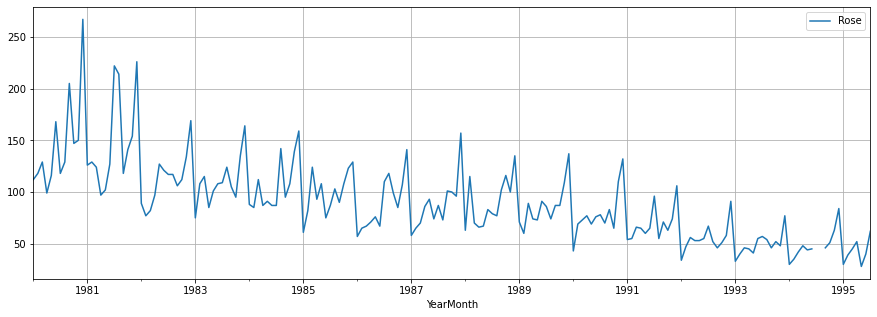

In [8]:
rcParams['figure.figsize'] = 15,5
df.plot(grid=True);

There is some missing values present in the dataset. Hence we have to handle those missing data. First, lets confirm that we have some missing data. 

In [9]:
#finding the number of missing data
df['Rose'].isnull().sum()

2

This means there are missing data for two months. Lets Immute the missing data.

### First deal with the missing data

In [10]:
df.interpolate(method='polynomial',order=1, inplace=True)

In [11]:
df['Rose'].isnull().sum()

0

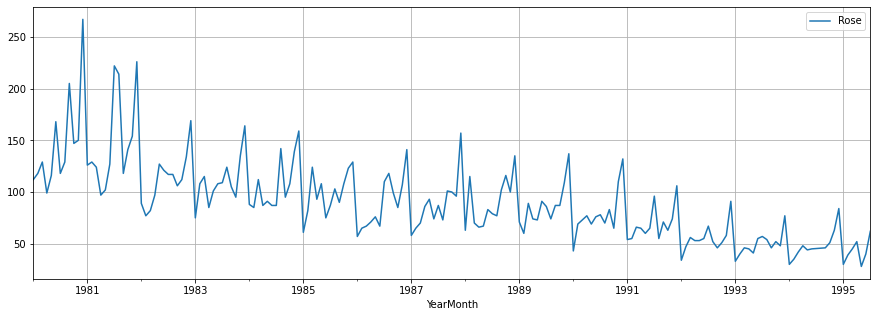

In [12]:
#plot after missing data interpolation
rcParams['figure.figsize'] = 15,5
df.plot(grid=True);

### Statistical analysis of the data

In [13]:
df.describe()

,Rose
count,187.000000
mean,89.914380
std,39.238391
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


### Box Plots

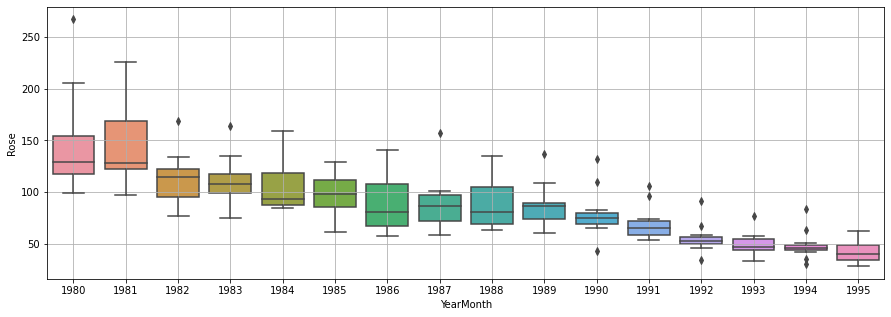

In [14]:
#Yearly Boxplot

sns.boxplot(x=df.index.year, y=df['Rose'])
plt.grid();

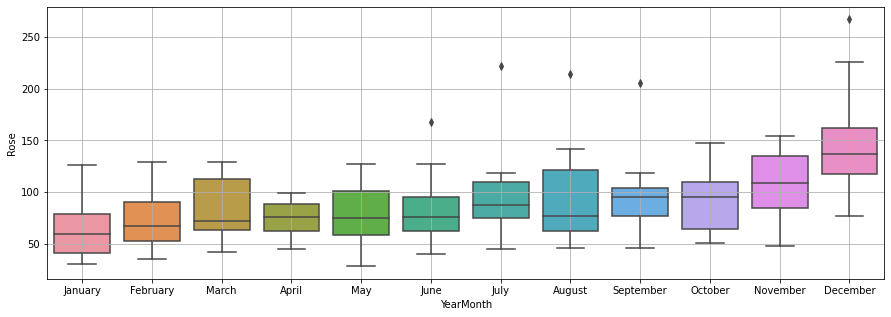

In [15]:
#Month wise Plot
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

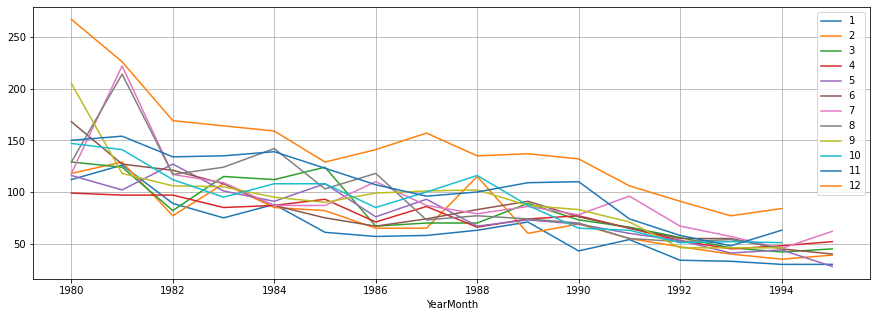

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### decomposition of data

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

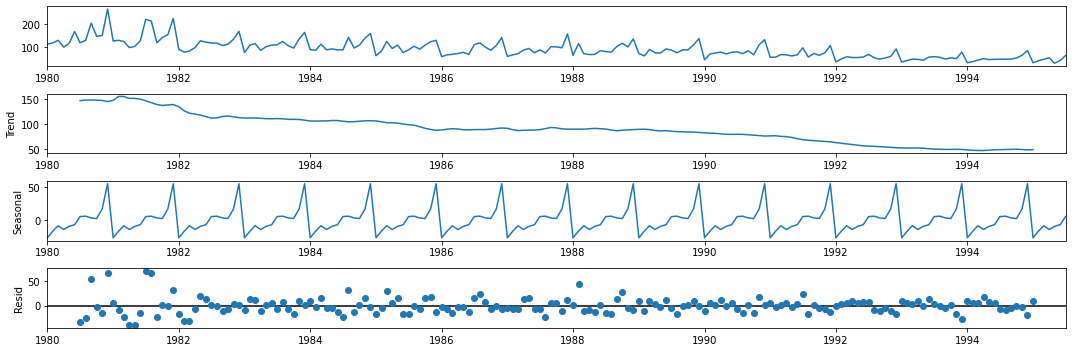

In [18]:
#decomposition_additive model

decomposition = seasonal_decompose(df, model='additive', period=None)
decomposition.plot();

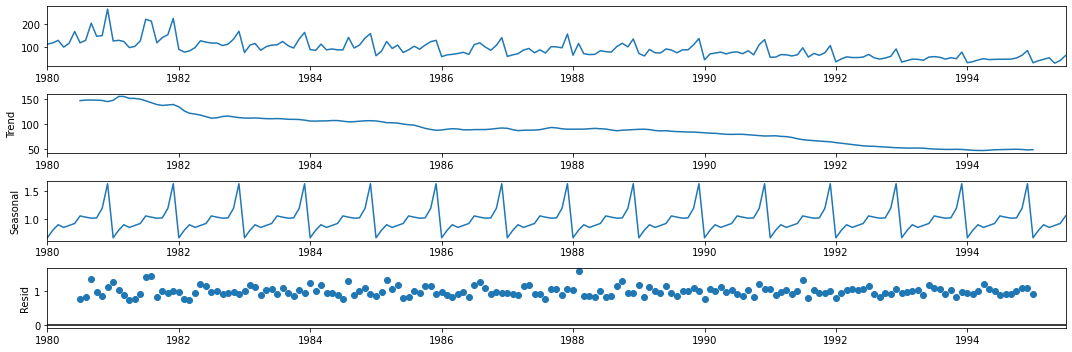

In [19]:
#decomposition_multiplicative model

decomposition = seasonal_decompose(df,model='multiplicative', period=None)
decomposition.plot();

Both of the models seems similar, hence we can go with additve model.

### Split the data to train and test

In [20]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

Note: Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [21]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [22]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0
1991-01-01,54.0


First few rows of Test Data


,Rose
YearMonth,
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [23]:
print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


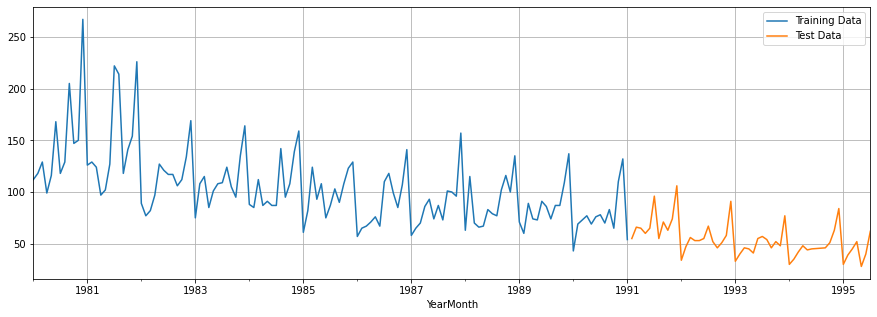

In [24]:
train['Rose'].plot(fontsize=10)
test['Rose'].plot(fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics

### Model 1: Linear Regression

In [25]:
[i+1 for i in range(len(train))]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133]

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

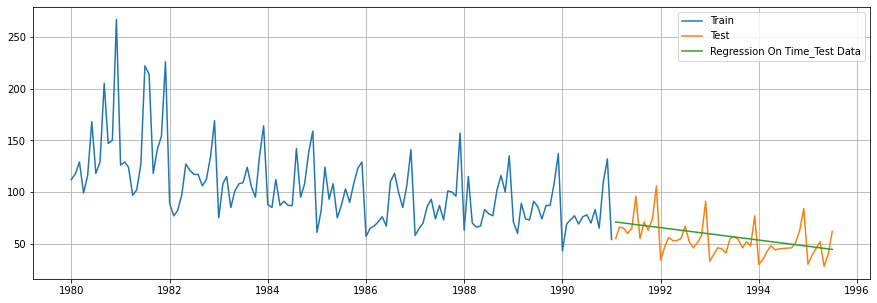

In [31]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(15,5))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [32]:
#Model Evaluation

#Test Data - RMSE

from sklearn import metrics
from sklearn.metrics import  mean_squared_error  
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.021


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.020761


### Model 2: Naive Approach

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    54.0
1991-03-01    54.0
1991-04-01    54.0
1991-05-01    54.0
1991-06-01    54.0
Name: naive, dtype: float64

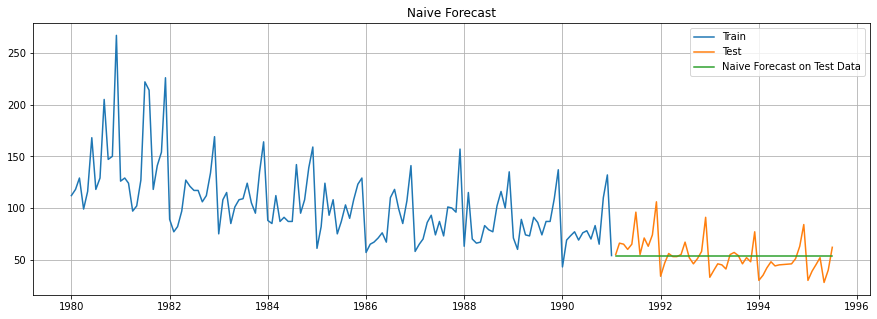

In [36]:
plt.figure(figsize=(15,5))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
# Model Evaluation

## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.906


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf_2

,Test RMSE
NaiveModel,15.905823


In [39]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823


### Method 3: Simple Average

In [40]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [41]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-02-01,55.0,104.556391
1991-03-01,66.0,104.556391
1991-04-01,65.0,104.556391
1991-05-01,60.0,104.556391
1991-06-01,65.0,104.556391


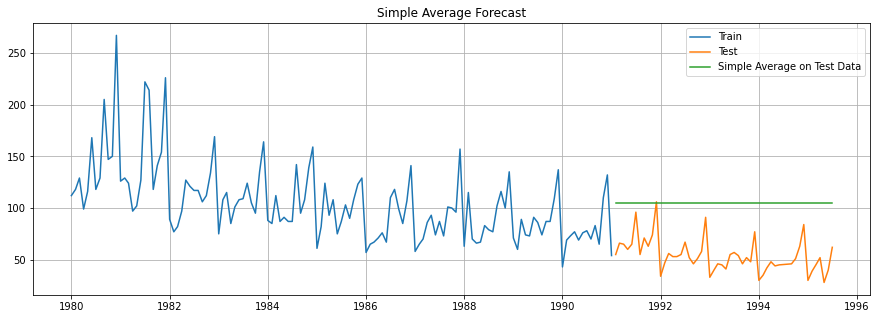

In [42]:
plt.figure(figsize=(15,5))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [43]:
#Model Evaluation

## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.141


In [44]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793


### Method 4: Moving Average(MA)

In [45]:
MovingAverage = df.copy()
MovingAverage['Rose'].rolling(2).mean()

YearMonth
1980-01-01      NaN
1980-02-01    115.0
1980-03-01    123.5
1980-04-01    114.0
1980-05-01    107.5
              ...  
1995-03-01     42.0
1995-04-01     48.5
1995-05-01     40.0
1995-06-01     34.0
1995-07-01     51.0
Name: Rose, Length: 187, dtype: float64

In [46]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_3,Trailing_4
YearMonth,,,,
1980-01-01,112.0,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN
1980-03-01,129.0,123.5,119.666667,NaN
1980-04-01,99.0,114.0,115.333333,114.5
1980-05-01,116.0,107.5,114.666667,115.5


In [47]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

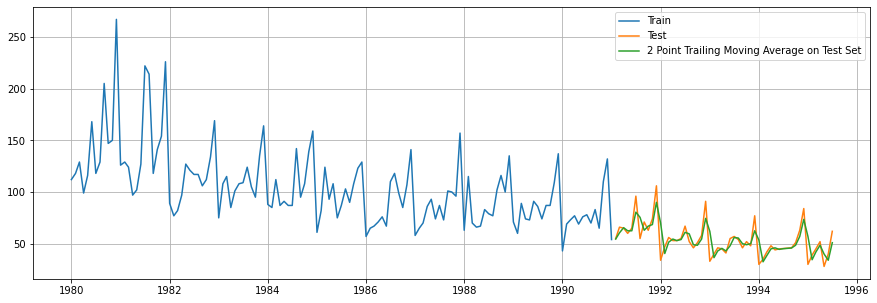

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,5))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [49]:
#Model Evaluation

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 10.355
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 12.896
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.725


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_3, rmse_model4_test_4]}
                           ,index=['2pt Trailing Moving Average', '3pt Trailing Moving Average', '4pt Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046


### Method 5: Simple Exponential Smoothing

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as em

In [52]:
# create class
model_SES = SimpleExpSmoothing(train)
model_SES_autofit = model_SES.fit(optimized=True)

In [53]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09764588811132549,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.4161767973802,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Smoothening level is 0.097

In [54]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict.head()

1991-02-01    83.845231
1991-03-01    83.845231
1991-04-01    83.845231
1991-05-01    83.845231
1991-06-01    83.845231
Freq: MS, dtype: float64

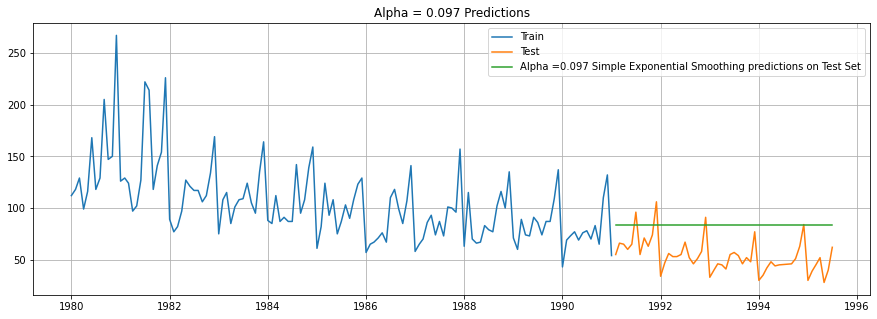

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.097 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.097 Predictions');

In [56]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [57]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 33.94978750496464
SES RMSE (calculated using statsmodels): 33.94978750496464


In [58]:
resultsDf5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.097,Simple Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046
"Alpha=0.097,Simple Exponential Smoothening",33.949788


### Method 6: Double Exponential Smoothing (Holt's Model)

In [59]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.head()

1991-02-01    82.019756
1991-03-01    82.364920
1991-04-01    82.710084
1991-05-01    83.055248
1991-06-01    83.400412
Freq: MS, dtype: float64

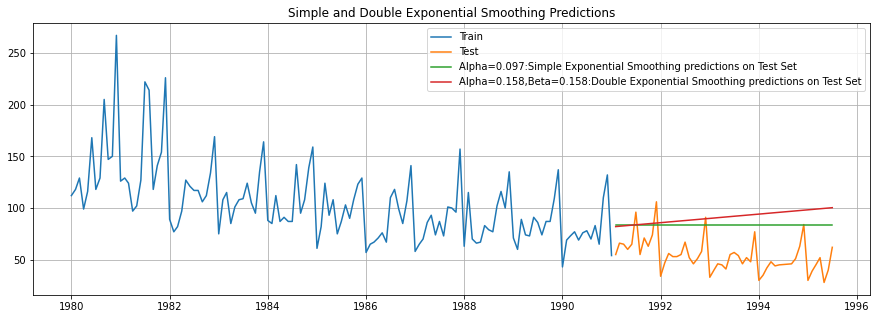

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.097:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.158,Beta=0.158:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

double exponential smoothing is picking up the trend component along with the level component as well.

In [62]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 41.78154696360843


In [63]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.158,Beta=0.158:Double Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046
"Alpha=0.097,Simple Exponential Smoothening",33.949788
"Alpha=0.158,Beta=0.158:Double Exponential Smoothening",41.781547


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [64]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive', seasonal_periods=12)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1331186644442344, 'smoothing_slope': 0.013554428338306631, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 74.39797248858115, 'initial_slope': 0.0, 'initial_seasons': array([ 41.28212857,  52.8827857 ,  60.84479563,  50.17286285,
        58.95330487,  64.37119552,  74.2454037 ,  80.30110862,
        76.26861133,  74.32487607,  92.3827285 , 134.62174753]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-02-01    57.354402
1991-03-01    64.939899
1991-04-01    53.891453
1991-05-01    62.295382
1991-06-01    67.336759
Freq: MS, dtype: float64

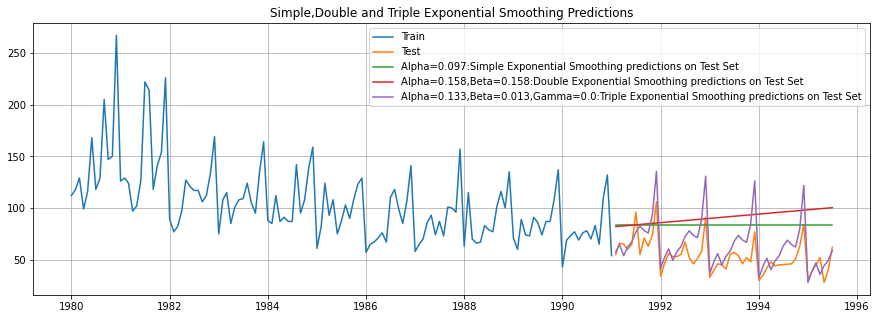

In [66]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.097:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.158,Beta=0.158:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

Triple Exponential Smoothing is picking up the seasonal component as well.

In [67]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 17.585776339592098


In [68]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046
"Alpha=0.097,Simple Exponential Smoothening",33.949788
"Alpha=0.158,Beta=0.158:Double Exponential Smoothening",41.781547
"Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing",17.585776


Inference: Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.
But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with multiplicative seasonality

In [69]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative', seasonal_periods=12)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10643064174464899, 'smoothing_slope': 0.048229219663542926, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 74.7707265509998, 'initial_slope': 0.0, 'initial_seasons': array([1.51004531, 1.70106855, 1.85123326, 1.62905341, 1.82311223,
       1.97458423, 2.16980492, 2.30812838, 2.17025835, 2.13364349,
       2.4701329 , 3.38772242]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am.head()

1991-02-01    63.140731
1991-03-01    68.413328
1991-04-01    59.937449
1991-05-01    66.780735
1991-06-01    72.007834
Freq: MS, dtype: float64

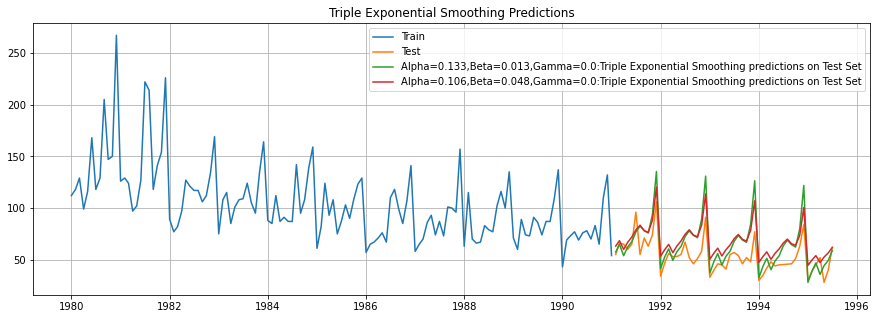

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.106,Beta=0.048,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [72]:
#model accuracy

print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 16.698662116391198


In [73]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.106,Beta=0.048,Gamma=0.0:Triple Exponential Smoothening'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,15.020761
NaiveModel,15.905823
SimpleAverageModel,53.140793
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046
"Alpha=0.097,Simple Exponential Smoothening",33.949788
"Alpha=0.158,Beta=0.158:Double Exponential Smoothening",41.781547
"Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing",17.585776
"Alpha=0.106,Beta=0.048,Gamma=0.0:Triple Exponential Smoothening",16.698662


*With multiplicative the RMSE for Triple Exponential Smoothening came out better because of the prominent trend involved.

In [74]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pt Trailing Moving Average,10.354667
3pt Trailing Moving Average,12.896039
4pt Trailing Moving Average,13.725046
RegressionOnTime,15.020761
NaiveModel,15.905823
"Alpha=0.106,Beta=0.048,Gamma=0.0:Triple Exponential Smoothening",16.698662
"Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing",17.585776
"Alpha=0.097,Simple Exponential Smoothening",33.949788
"Alpha=0.158,Beta=0.158:Double Exponential Smoothening",41.781547
SimpleAverageModel,53.140793


The RMSE shows that 2 pt moving average gives the better model.

### Check for stationarity of the original Time Series data on which model will be built

In [75]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
      
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [76]:
test_stationarity(train['Rose'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.164965
p-value                          0.219206
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



We see that at 5% significant level the Time Series is non-stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

### Making the data stationary

In [77]:
#making the data stationary with difference of 1

test_stationarity(df['Rose'].diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.044389e+00
p-value                        1.810924e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



We can see that now with lag 1, the Time Series comes out to be stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

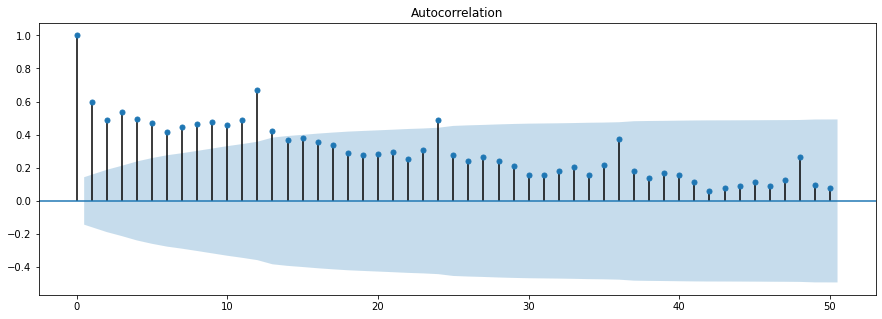

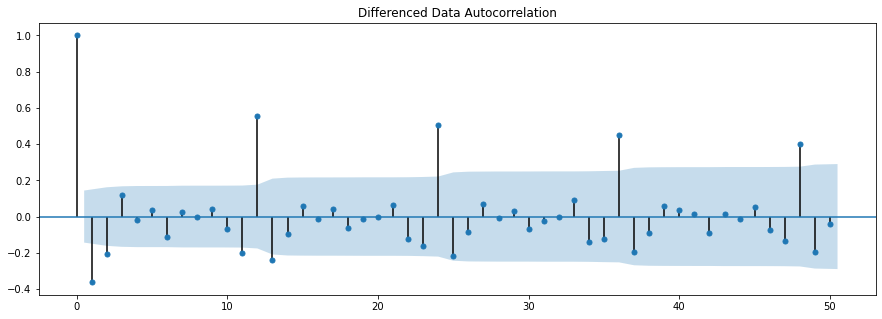

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

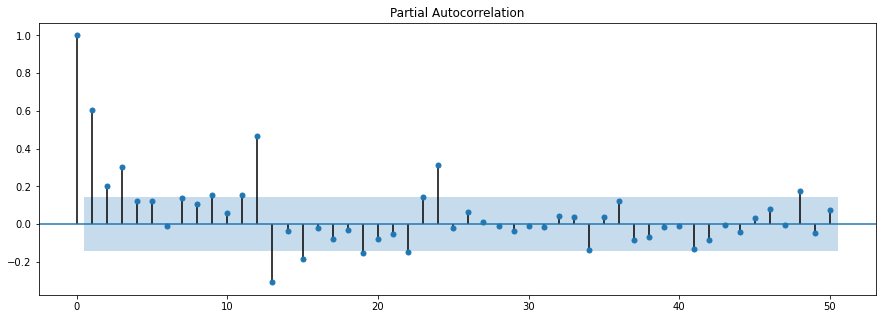

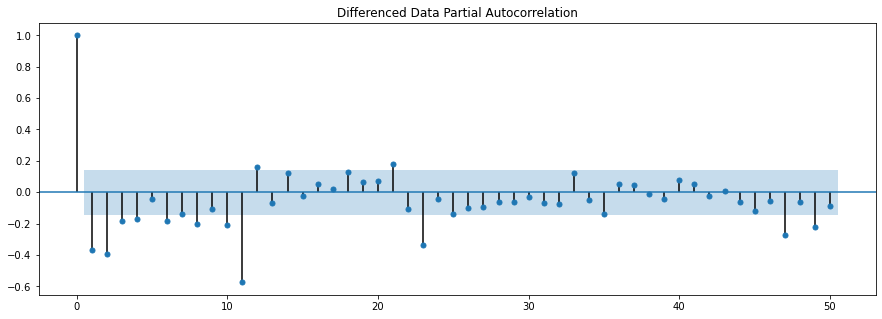

In [79]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From these differenced acf and pacf plots we can find that p=1, q=1 for d=1.

### Building an Automated ARIMA model as per the lowest AIC

In [80]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [81]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [82]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [83]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1348.279904268987
ARIMA(0, 1, 1) - AIC:1289.926124901873
ARIMA(0, 1, 2) - AIC:1286.4638185477029
ARIMA(1, 1, 0) - AIC:1332.0486539146261
ARIMA(1, 1, 1) - AIC:1287.3927518570606
ARIMA(1, 1, 2) - AIC:1286.6599419280267
ARIMA(2, 1, 0) - AIC:1311.6125233036457
ARIMA(2, 1, 1) - AIC:1288.5148249939791
ARIMA(2, 1, 2) - AIC:1288.6465846461033


In [84]:
# Sort AIC values in ascending order for minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1286.463819
5,"(1, 1, 2)",1286.659942
4,"(1, 1, 1)",1287.392752
7,"(2, 1, 1)",1288.514825
8,"(2, 1, 2)",1288.646585
1,"(0, 1, 1)",1289.926125
6,"(2, 1, 0)",1311.612523
3,"(1, 1, 0)",1332.048654
0,"(0, 1, 0)",1348.279904


In [85]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2), freq=None)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -639.232
Method:                       css-mle   S.D. of innovations             30.162
Date:                Thu, 09 Sep 2021   AIC                           1286.464
Time:                        09:21:02   BIC                           1297.995
Sample:                    02-01-1980   HQIC                          1291.150
                         - 01-01-1991                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5011      0.083     -6.016      0.000      -0.664      -0.338
ma.L1.D.Rose    -0.7722      0.101     -7.649      0.000      -0.970      -0.574
ma.L2.D.Rose    -0.2278      0.096     -2.36

### Evaluate the model and Predict on Test Set

In [86]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [87]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

14.926296231370925


In [88]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Auto(0,1,2)'])
resultsDf

,RMSE
"ARIMA_Auto(0,1,2)",14.926296


### Building an Automated SARIMA model as per the lowest AIC

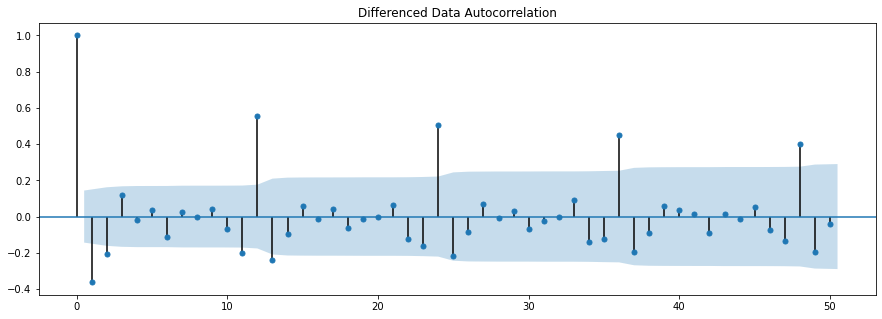

In [89]:
# Checking the ACF plot for the seasonal parameter for the SARIMA model

plot_acf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 12 for the first iteration of the auto SARIMA model

In [90]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [91]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [92]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1337.085435720141
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1155.3473105764485
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:987.6216499471068
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1149.4077143332859
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1125.928222182423
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:978.7245367274162
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:969.7738313949183
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:971.761670738088
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:964.333778615361
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1273.3863931008864
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1106.9859687030355
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:931.3795822902133
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1103.9900395459279
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1062.874396460418
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:926.8389408846264
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:922.3963322561094
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:922.9779248199573
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:908.8468014533959
SARIMA(0, 1, 2)x(0, 0, 0,

In [93]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",895.600552
53,"(1, 1, 2)","(2, 0, 2, 12)",897.543863
80,"(2, 1, 2)","(2, 0, 2, 12)",898.277993
69,"(2, 1, 1)","(2, 0, 0, 12)",904.301828
78,"(2, 1, 2)","(2, 0, 0, 12)",905.189238


In [94]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -440.800
Date:                            Thu, 09 Sep 2021   AIC                            895.601
Time:                                    09:23:06   BIC                            914.178
Sample:                                         0   HQIC                           903.129
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8452    887.095     -0.001      0.999   -1739.519    1737.829
ma.L2         -0.1548    137.376   

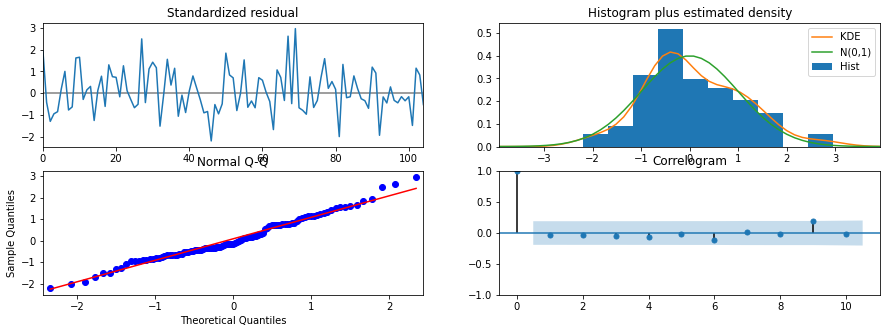

In [95]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Evaluate the model and Predict on Test Set

In [96]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [97]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,69.155978,15.871838,38.047746,100.264209
1,76.985824,16.083729,45.462295,108.509352
2,75.974567,16.083729,44.451039,107.498096
3,72.447605,16.083729,40.924076,103.971134
4,78.902259,16.083729,47.378731,110.425788


In [98]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.477111058652604


In [99]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Auto_Season12(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_Auto(0,1,2)",14.926296
"SARIMA_Auto_Season12(0,1,2)(2,0,2,12)",26.477111


### Building Manual ARIMA model based on ACF and the PACF cutoffs

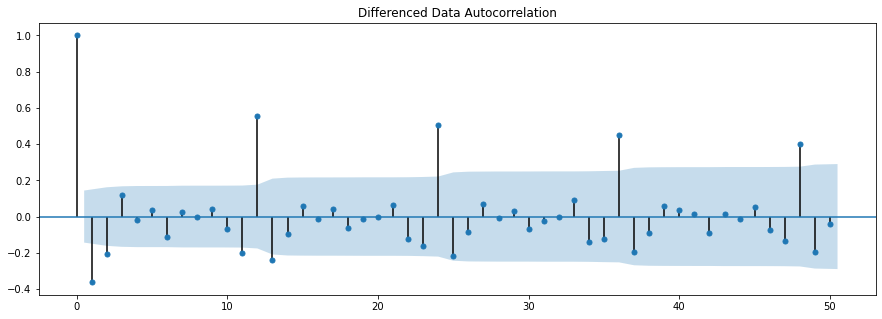

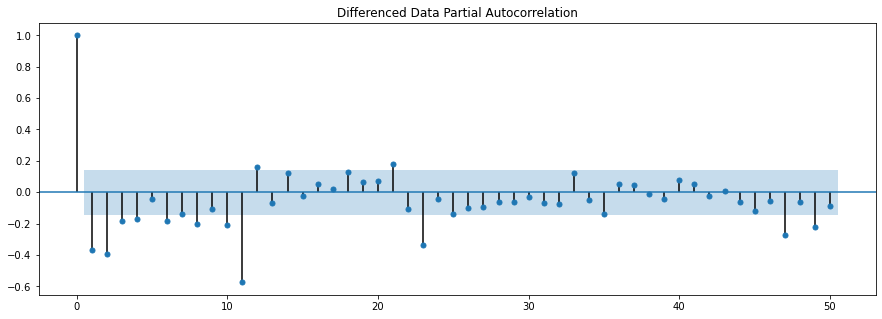

In [100]:
#ACF and PACF Plot for reference

plot_acf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

By looking at the above plots, we can say that

'p', the Auto-Regressive parameter in ARIMA model, has PACF plot cuts-off of 1.

'q', the Moving-Average parameter in ARIMA,has ACF plot cuts-off of 1.

'd' is already considered as 1

In [101]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(1,1,1),freq=None)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -639.696
Method:                       css-mle   S.D. of innovations             30.270
Date:                Thu, 09 Sep 2021   AIC                           1287.393
Time:                        09:23:08   BIC                           1298.924
Sample:                    02-01-1980   HQIC                          1292.079
                         - 01-01-1991                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4998      0.084     -5.983      0.000      -0.664      -0.336
ar.L1.D.Rose     0.1858      0.086      2.158      0.031       0.017       0.355
ma.L1.D.Rose    -0.9999      0.031    -31.83

### Evaluate the model and prediction

In [102]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [103]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.02302569608308


In [104]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Manual(1,1,1)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_Auto(0,1,2)",14.926296
"SARIMA_Auto_Season12(0,1,2)(2,0,2,12)",26.477111
"ARIMA_Manual(1,1,1)",15.023026


### Building Manual SARIMA model based on ACF and the PACF cutoffs

#### Taking Seasonality paramter as 12

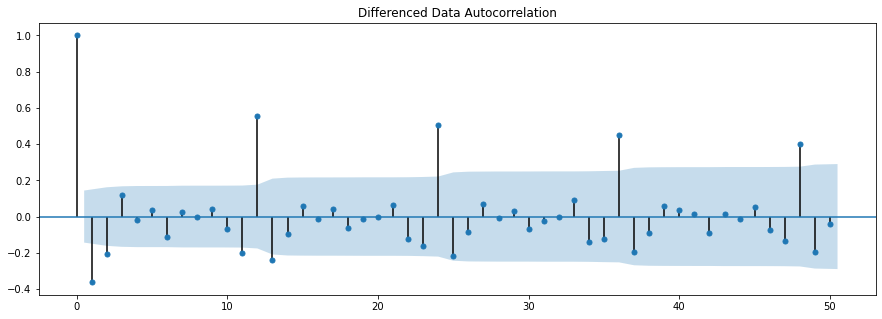

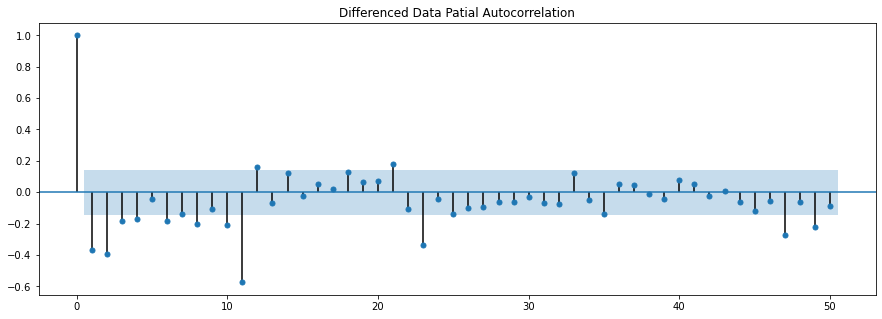

In [105]:
#finding p,q
plot_acf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

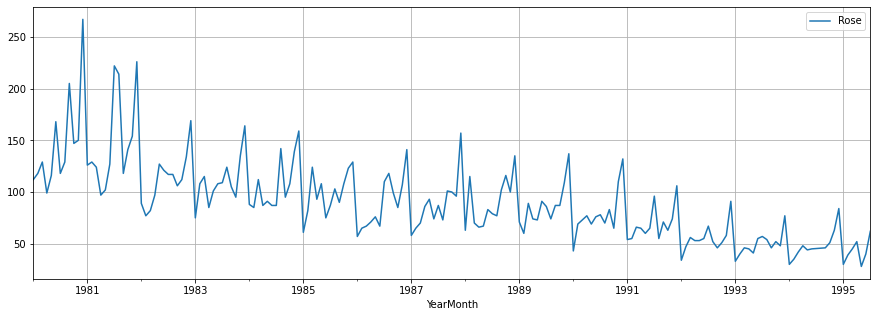

In [106]:
df.plot()
plt.grid();

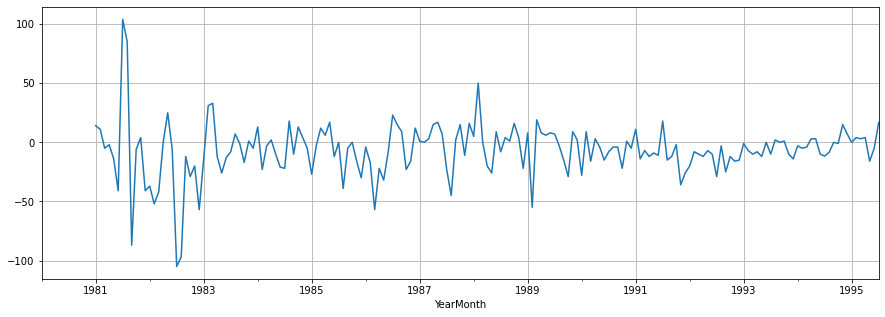

In [107]:
(df['Rose'].diff(12)).plot()
plt.grid();

In [108]:
adfuller((df['Rose'].diff(12)).dropna())

(-4.255330703712227,
 0.0005303449923888474,
 11,
 163,
 {'1%': -3.471118535474365,
  '5%': -2.8794405060097024,
  '10%': -2.576313761526591},
 1349.0880419159744)

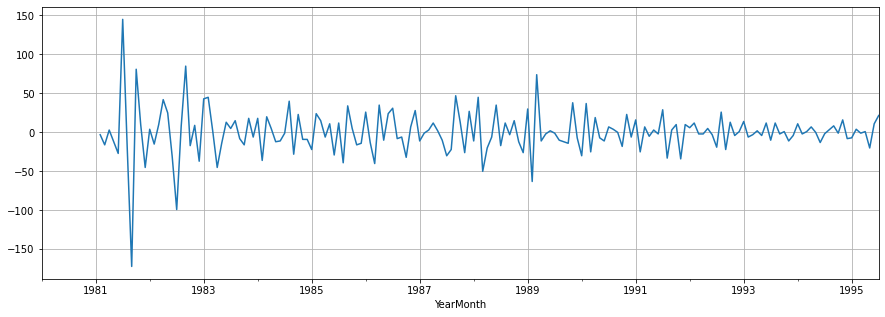

In [109]:
(df['Rose'].diff(12).diff()).plot()
plt.grid();

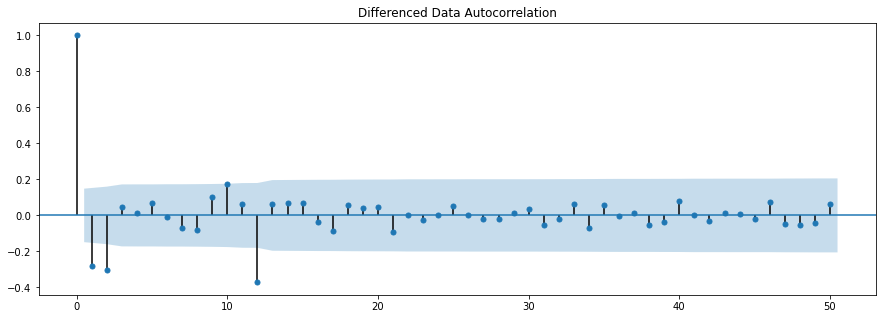

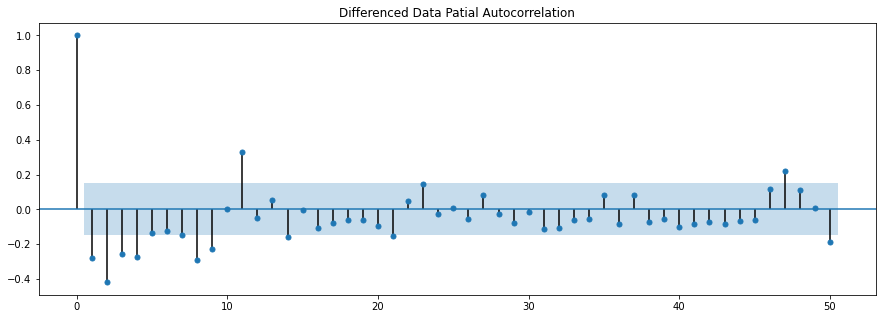

In [110]:
#finding P,Q
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

Looking at the acf and pacf plots for trend and seasonality, we can say that following are the values:

For Trend, p=1,q=1 for d=1. For Seasonality, P=1, Q=1 for D=1 and S=12

In [111]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -462.548
Date:                            Thu, 09 Sep 2021   AIC                            935.095
Time:                                    09:23:12   BIC                            948.413
Sample:                                         0   HQIC                           940.493
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2147      0.116      1.851      0.064      -0.013       0.442
ma.L1         -0.9292      0.054   

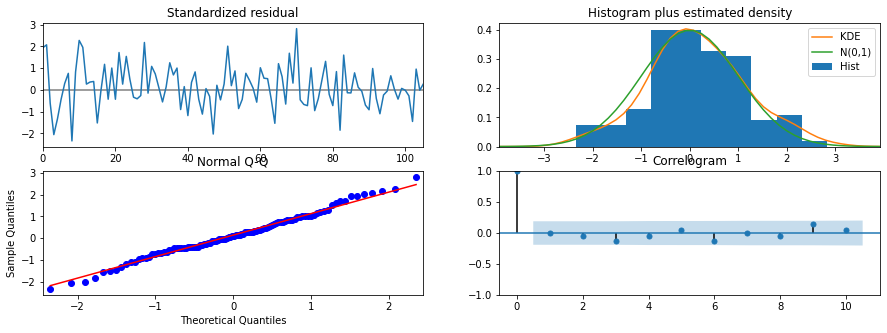

In [112]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

### evaluating the model and prediction

In [113]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [114]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

18.290314656505107


In [115]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Manual(1,1,1)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA_Auto(0,1,2)",14.926296
"SARIMA_Auto_Season12(0,1,2)(2,0,2,12)",26.477111
"ARIMA_Manual(1,1,1)",15.023026
"SARIMA_Manual(1,1,1)(1,1,1,12)",18.290315


In [117]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE
"ARIMA_Auto(0,1,2)",14.926296
"ARIMA_Manual(1,1,1)",15.023026
"SARIMA_Manual(1,1,1)(1,1,1,12)",18.290315
"SARIMA_Auto_Season12(0,1,2)(2,0,2,12)",26.477111


## Building optimum model on complete Data

In [149]:
optimum_model_ARIMA = ARIMA(df['Rose'], order=(0,1,2),freq=None)

final_model_ARIMA = optimum_model_ARIMA.fit()

print(final_model_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -876.961
Method:                       css-mle   S.D. of innovations             26.649
Date:                Thu, 09 Sep 2021   AIC                           1761.922
Time:                        09:57:56   BIC                           1774.825
Sample:                    02-01-1980   HQIC                          1767.151
                         - 07-01-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5229      0.043    -12.027      0.000      -0.608      -0.438
ma.L1.D.Rose    -0.7923      0.082     -9.619      0.000      -0.954      -0.631
ma.L2.D.Rose    -0.2076      0.081     -2.57

In [151]:
prediction = final_model_ARIMA.predict(len(df), len(df)+12)

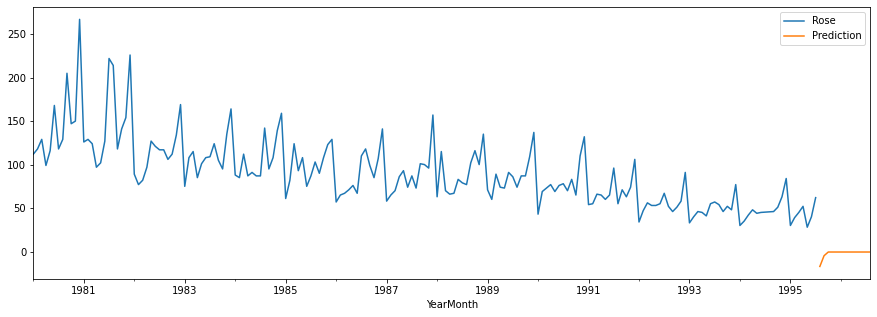

In [154]:
# plot the forecast along with the confidence band

df.plot(legend=True, label='Train', figsize=(15,5))
prediction.plot(legend=True, label='Prediction')
plt.show()

The prediction doesnot seem good actually. let's go with SARIMA and see the predictions.

### SARIMA model and prediction of 12 months into the future

In [161]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -674.933
Date:                            Thu, 09 Sep 2021   AIC                           1359.866
Time:                                    10:21:50   BIC                           1375.242
Sample:                                01-01-1980   HQIC                          1366.110
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.085      2.292      0.022       0.028       0.363
ma.L1         -0.9142      0.044   

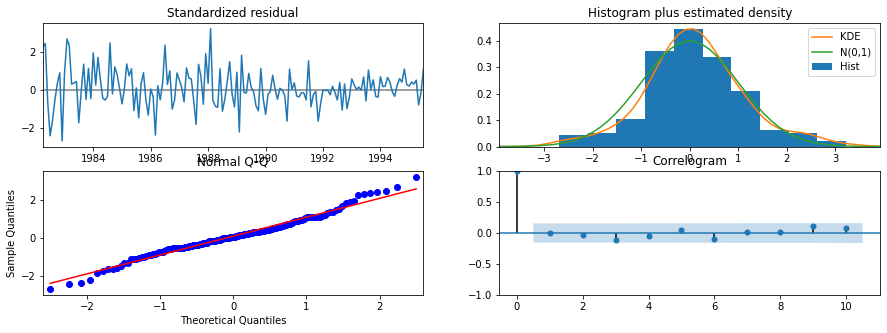

In [162]:
results_full_data_model.plot_diagnostics();

### predict 12 months into the future

In [163]:
predicted_automated_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [164]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.766447278269826


In [165]:
pred_full_automated_SARIMA_date = predicted_automated_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-1',end='1996-8-1', freq='M'))

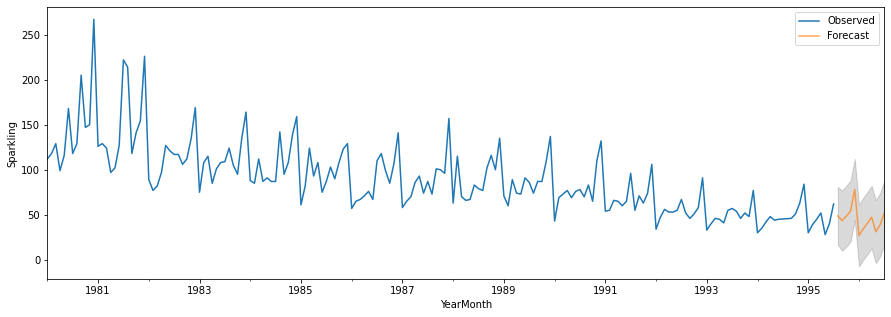

In [166]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_automated_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_automated_SARIMA_date.index, pred_full_automated_SARIMA_date['mean_ci_lower'], 
                  pred_full_automated_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

### ---END--